# Data Mining Lab 1
Student ID : 110062599  
Name : 張仲穎  
I only go through the part that is essential to predict the model.  
Some detail practices for dataframe, plotting, ...etc have already done in lab and part 1 of the homework, so I don't do it here again.

---

# Part 2

In [1]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

## 1. The Data & 2. Data Preparation & 3. Data Transformation

In [2]:
import pandas as pd

In [3]:
def readTxt(docs):
    """ format the text field and strip special characters """
    D1 = []
    D2 = []
    for line in docs:
        temp_sentence, temp_score = line.split("\t")
        temp_score = int(temp_score[0])
        D1.append(temp_sentence)
        D2.append(temp_score)
    return D1, D2

### 3.1 Converting Dictionary into Pandas Dataframe

In [4]:
with open('./dataset/amazon_cells_labelled.txt', 'r') as f:
    D1, D2 = readTxt(f)
    dict = {'sentence': D1, 'score': D2}  
    df_amazon = pd.DataFrame(dict) 
    f.close()
df_amazon

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [5]:
with open('./dataset/imdb_labelled.txt', 'r') as f:
    D1, D2 = readTxt(f)
    dict = {'sentence': D1, 'score': D2}  
    df_imbd = pd.DataFrame(dict) 
    f.close()
df_imbd

,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
995,I just got bored watching Jessice Lange take h...,0
996,"Unfortunately, any virtue in this film's produ...",0
997,"In a word, it is embarrassing.",0
998,Exceptionally bad!,0


Let's take at look some of the records that are contained in our subset of the data

In [6]:
with open('./dataset/yelp_labelled.txt', 'r') as f:
    D1, D2 = readTxt(f)
    dict = {'sentence': D1, 'score': D2}  
    df_yelp = pd.DataFrame(dict) 
    f.close()
df_yelp

,sentence,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [7]:
df_total = pd.concat([df_amazon, df_imbd, df_yelp], axis=0)
df_total

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


---

## 4. Data Mining using Pandas

### 4.1 Missing Values Check

In [8]:
import helpers.data_mining_helpers as dmh

In [9]:
df_total.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [10]:
df_total.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
995    (The amoung of missing records is: , 0)
996    (The amoung of missing records is: , 0)
997    (The amoung of missing records is: , 0)
998    (The amoung of missing records is: , 0)
999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

---

### 4.2 Duplicate Data Check

First, let us check how many duplicates we have in our current dataset. Here is the line of code that checks for duplicates; it is very similar to the `isnull` function that we used to check for missing values. 

In [11]:
df_total.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 3000, dtype: bool

We can also check the sum of duplicate records by simply doing:

In [12]:
sum(df_total.duplicated())

17

In [13]:
sum(df_total.duplicated('sentence'))

17

In [14]:
df_total.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [15]:
len(df_total)

2966

---

## Data Preprocessing

- Sampling (1000 in 2966)
- Feature Creation
- Feature Subset Selection
- Dimensionality Reduction (PCA, n_components = 2, because it's binary classification.)
- Attribute Transformation / Aggregation
- Discretization and Binarization (I don't do this part , because one-hot encoding is useless in binary case.)

---

### 5.1 Sampling

In [16]:
df_sample = df_total.sample(n=1000) #random state

In [17]:
len(df_sample)

1000

In [18]:
df_sample[0:4]

,sentence,score
907,Hated it.,0
97,Food arrived quickly!,1
570,Eew... This location needs a complete overhaul.,0
284,I would definitely recommend the wings as well...,1


---

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

0    1486
1    1480
Name: score, dtype: int64


<AxesSubplot:title={'center':'Score distribution'}>

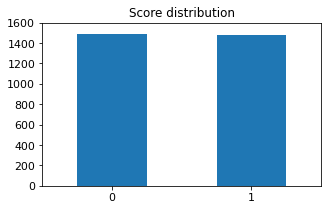

In [20]:
print(df_total.score.value_counts())

# plot barchart for X_sample
df_total.score.value_counts().plot(kind = 'bar',
                                    title = 'Score distribution',
                                    ylim = [0, 1600],        
                                    rot = 0, fontsize = 11, figsize = (5,3))

0    504
1    496
Name: score, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

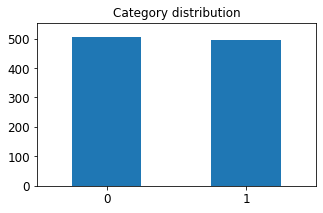

In [21]:
upper_bound = max(df_sample.score.value_counts()) + 50

print(df_sample.score.value_counts())

# plot barchart for X_sample
df_sample.score.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (5,3))

---

### 5.2 Feature Creation

In [22]:
import nltk

In [23]:
# takes a like a minute or two to process
df_total['unigrams'] = df_total['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [24]:
df_total[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

If you take a closer look at the `X` table now, you will see the new columns `unigrams` that we have added. You will notice that it contains an array of tokens, which were extracted from the original `text` field. At first glance, you will notice that the tokenizer is not doing a great job, let us take a closer at a single record and see what was the exact result of the tokenization using the `nltk` library.

In [25]:
df_total[0:4]

,sentence,score,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."


In [26]:
list(df_total[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

---

### 5.3 Feature subset selection 

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df_total.sentence)

In [28]:
analyze = count_vect.build_analyzer()

In [29]:
analyze(" ".join(list(df_total[:1].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [30]:
# We can check the shape of this matrix by:
df_counts.shape

(2966, 5153)

In [31]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

/home/hsnl-iot/anaconda3/envs/seedenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [32]:
# we convert from sparse array to normal array
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

---

In [33]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [34]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [35]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df_total.index)[0:20]]

In [36]:
plot_z = df_counts[0:20, 0:20].toarray()

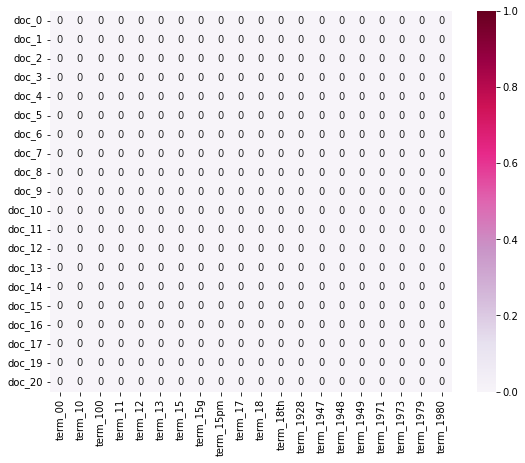

In [37]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

---

### 5.4 Dimensionality Reduction

In [38]:
from sklearn.decomposition import PCA

In [39]:
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())

In [40]:
df_reduced.shape

(2966, 2)

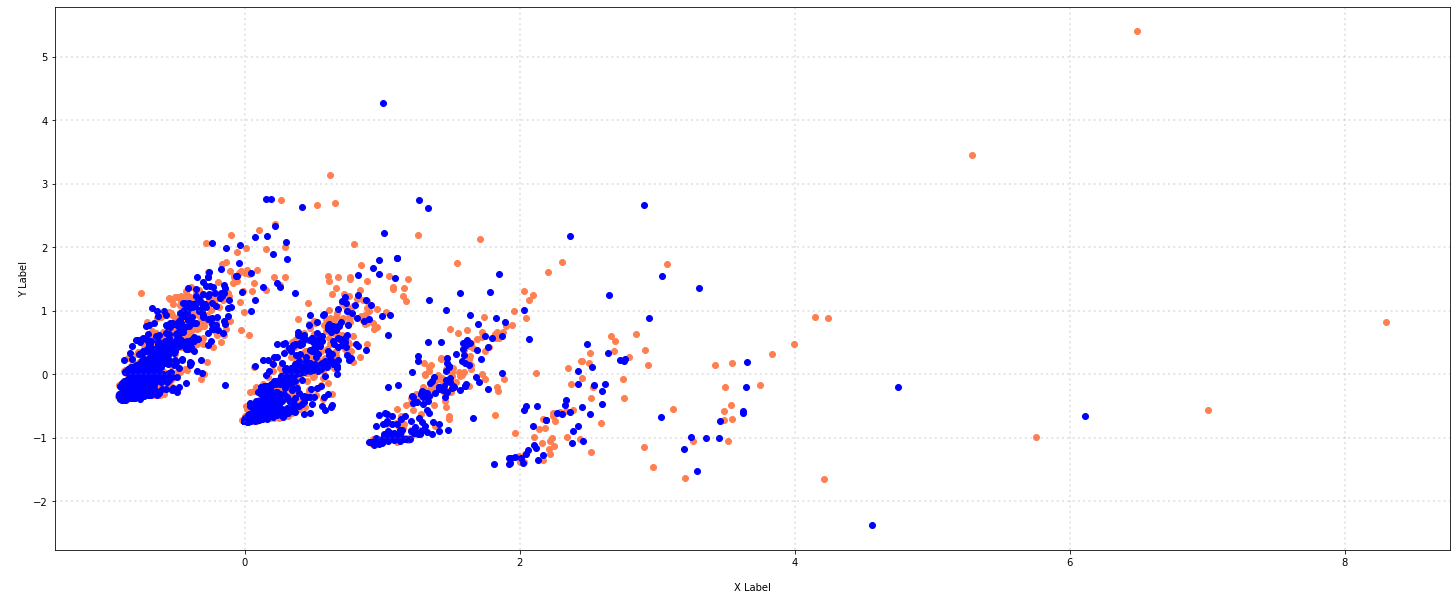

In [41]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()
scores = [1, 0]
for c, score in zip(col, scores):
    xs = df_reduced[df_total['score'] == score].T[0]
    ys = df_reduced[df_total['score'] == score].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

---

### 5.5 Atrribute Transformation / Aggregation

In [42]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
import numpy as np
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [43]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [44]:
term_frequencies[0]

1

/home/hsnl-iot/anaconda3/envs/seedenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/hsnl-iot/anaconda3/envs/seedenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


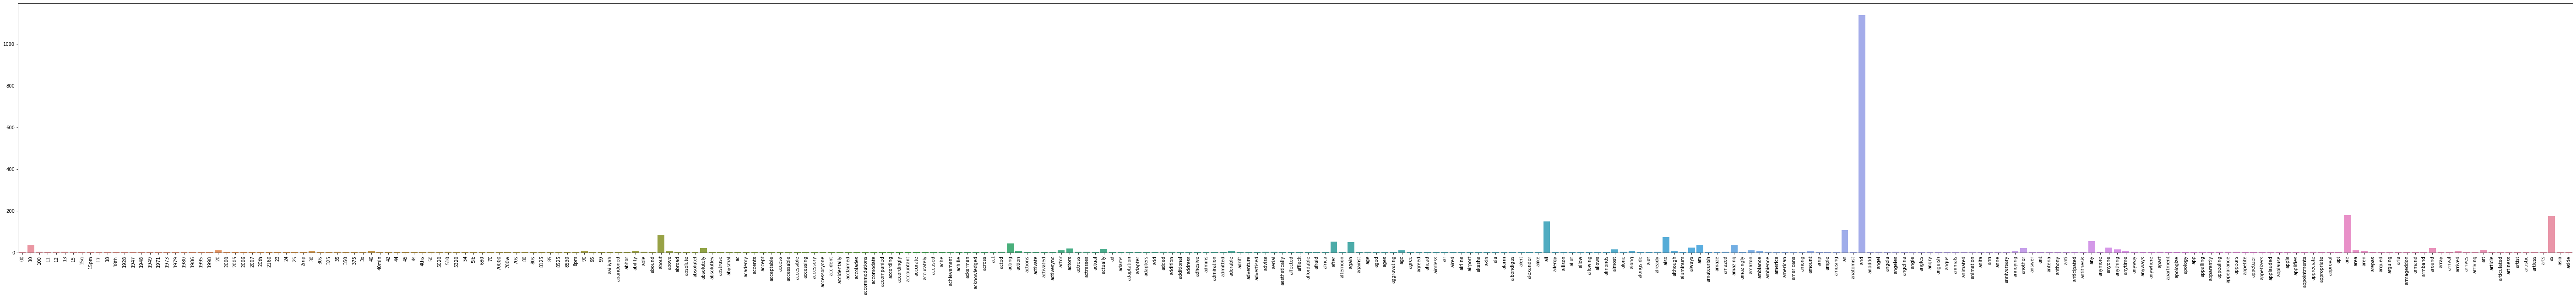

In [45]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

---

In [46]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/home/hsnl-iot/anaconda3/envs/seedenv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


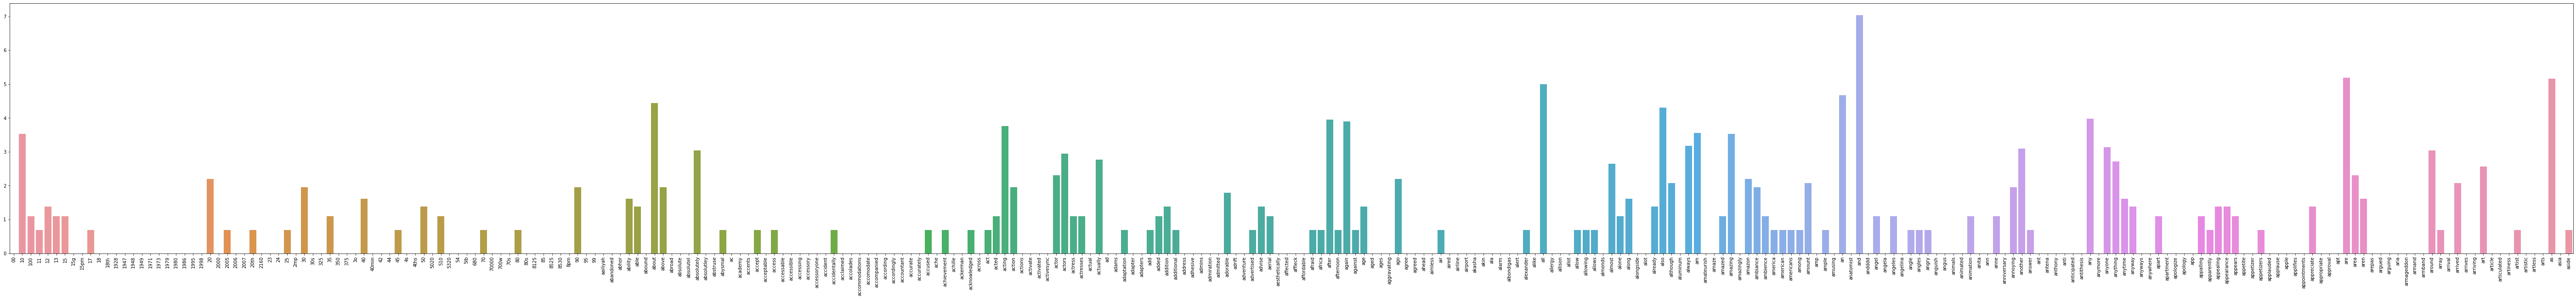

In [47]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

---

# 6. Data Exploration

In [48]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = df_total.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df_total.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)


In [49]:
print(document_to_transform_1)
print(document_to_transform_2)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']


In [50]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [51]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


---

# Part 3
I use **Gaussian Naive Bayes** model to predict the result.

### New Data Visualization

In [52]:
score = 'score : 1', 'score : 0'
one = (df_total['score'] == 1)
zero = (df_total['score'] == 0)
counts = [len(df_total[one]), len(df_total[zero])]
colors = ['lightcoral', 'lightskyblue']

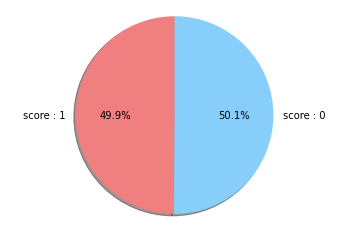

In [53]:
patches= plt.pie(counts,labels = score, autopct = '%1.1f%%', colors = colors, shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

### Tfidf vectorize


In [54]:
# preprocessing function

import re
from bs4 import BeautifulSoup

def preprocessor(text):
    text = BeautifulSoup(text, 'html.parser').get_text()
    
    r = '(?::|;|=|X)(?:-)?(?:\)|\(|D|P)'
    emoticons = re.findall(r, text)
    text = re.sub(r, '', text)
    text = re.sub(r"[^a-zA-Z0-9]+", ' ', text)
    
    text = re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-','')
    return text

In [55]:
# tokenizer function

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
stop = stopwords.words('english')
stop.append("utc")
def tokenizer_stem_nostop(text):
    porter = PorterStemmer()
    return [porter.stem(w) for w in re.split('\s+', text.strip()) \
            if w not in stop and re.match('[a-zA-Z]+', w)]

[nltk_data] Downloading package stopwords to /home/hsnl-
[nltk_data]     iot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(preprocessor=preprocessor, tokenizer=tokenizer_stem_nostop)
vector.fit(df_total['sentence'])
df_feature = vector.transform(df_total['sentence']).toarray()

/home/hsnl-iot/anaconda3/envs/seedenv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [57]:
df_feature

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# X_train, X_test, y_train, y_test = train_test_split(df_total['sentence'], df_total['score'], random_state=0)
name = "GaussianNB (TfidfVectorizer)"
gnb = GaussianNB()
scores = cross_val_score(estimator=gnb, X=df_feature, y=df_total['score'], cv=10, scoring='roc_auc')
print('%s: %.3f (+/-%.3f)' % (name, scores.mean(), scores.std()))

# model = gnb.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print("Number of mislabeled points out of a total %d points : %d"
# ...       % (X_test.shape[0], (y_test != y_pred).sum()))

GaussianNB (TfidfVectorizer): 0.682 (+/-0.031)


### Count vectorize

In [59]:
count = CountVectorizer(ngram_range=(1, 1),
                        preprocessor=preprocessor,
                        tokenizer=tokenizer_stem_nostop)
count.fit(df_total['sentence'])
df_feature2 = count.transform(df_total['sentence']).toarray()

/home/hsnl-iot/anaconda3/envs/seedenv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [60]:
name = "GaussianNB (CountVectorizer)"
gnb = GaussianNB()
scores = cross_val_score(estimator=gnb, X=df_feature2, y=df_total['score'], cv=10, scoring='roc_auc')
print('%s: %.3f (+/-%.3f)' % (name, scores.mean(), scores.std()))

GaussianNB (CountVectorizer): 0.677 (+/-0.062)


# Part 4

Using this dataset as an example, I find some steps can be skipped in this case.
- Sampling : Dataset is small, so we can train the model without sampling. Sampling may be useful only when we want to test/show some results quickly, but it's not necessary.
- Get dataset : This time, I download the dataset to my computer and access it from local, so the step I read from files maybe different from read it from internet(api?). 
- PCA : Dataset is used to do binary classification, so we don't need PCA, either.
- Data Tranformation : We can choose the best one between countvectorizer, tfidfvectorizer, and hashingvectorizer.
- Feature selection : It's hard to select useful words from these sentences, we can use to tokenizer_stem_nostop function to deal with some of the stop words, and it might improve the feature selection's efficiency and quality.